download images

In [27]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2
import math
import scipy.stats as st

!wget https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0 -O th_img.jpg
!wget https://www.dropbox.com/s/e9y352iocrc2bpt/cnt_img.jpg?dl=0 -O cnt_img.jpg
!wget https://www.dropbox.com/s/y61wbt48ztiwr1y/scene1.jpg?dl=0 -O scene.jpg
!wget https://www.dropbox.com/s/cgxrvpmtlouinxo/book1.jpg?dl=0 -O book.jpg
!wget https://www.dropbox.com/s/agjglpthhstnm6f/final%20%281%29.jpg?dl=0 -O final_template.jpg
!wget https://www.dropbox.com/s/56zqbf11pkzn8qx/classification%20%281%29.jpg?dl=0 -O classes.jpg
!wget https://www.dropbox.com/s/scbsb0rqx490lmm/blocks.jpg?dl=0 -O blocks.jpg
!wget https://www.dropbox.com/s/8ilfln1bsvw9ol6/labeled_blocks.jpg?dl=0 -O blocks_labeld.jpg

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-12-27 13:11:47--  https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0
Resolving www.dropbox.com... 162.125.71.18
Connecting to www.dropbox.com|162.125.71.18|:443... connected.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
Unable to establish SSL connection.
SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-12-27 13:11:48--  https://www.dropbox.com/s/e9y352iocrc2bpt/cnt_img.jpg?dl=0
Resolving www.dropbox.com... 162.125.71.18
Connecting to www.dropbox.com|162.125.71.18|:443... connected.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
Unable to establish SSL connection.
SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-12-27 13:11:48--  https://www.dropbox.com/s/y61wbt48ztiwr1y/s

Helper functions - it is optional to use them

In [28]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]

### Template Matching

Detect the location of the template (book.jpg) within the scene (scene.jpg)
you should solve the problem only with the method `cv2.matchTemplate`

use interactive interface to select the best method



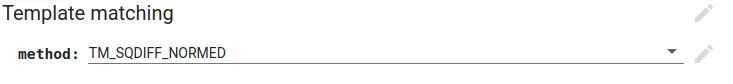

The output should be like follow:

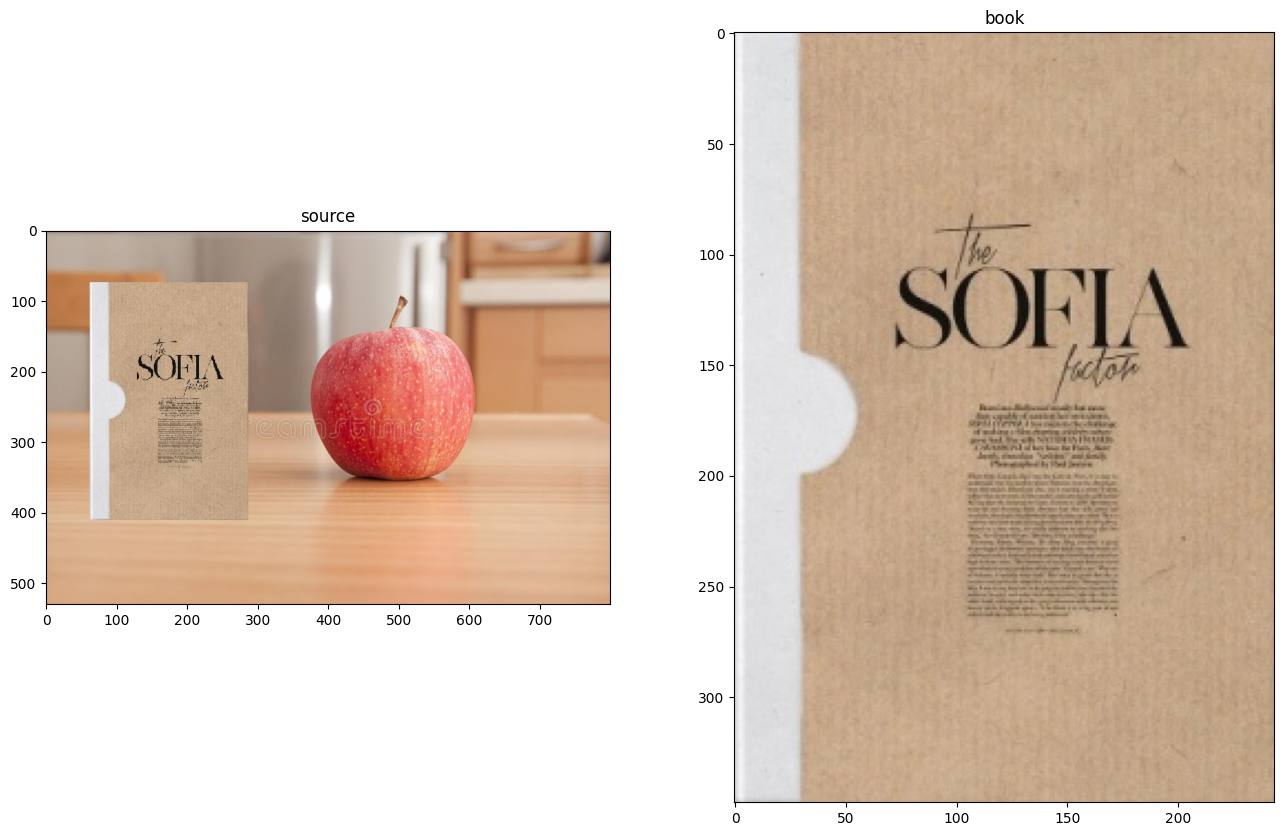

In [29]:
# DO NOT change these codes
scene = cv2.imread("E:\\Python Django\\Hackathon\\object_detector\\media\\uploads\\backgrounds\\scene.jpg")
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
book = cv2.imread("E:\\Python Django\\Hackathon\\object_detector\\media\\uploads\\objects\\object.jpg")
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
# final = cv2.imread("final_template.jpg")
# final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
showInRow([scene, book],["source",  "book"])

### Solution

The solution for this task is as follows: 
* Approach 1 - The biggest hurdle for this task was the image pre-processing part which required rotating the `source_image` to match the orientation of `book_image`. In this approach, I wrote a function to rotate an image along a point with some angle. The `rotated_image` was somehow cropped but I still passed it through the `match_template` function. Lastly, I re-rotated the output image but it had some black edges along and it was cropped, therefore I decided to discard this method. 

* Approach 2 - After the unsuccessful approach, I did a bit of research and found the `rotate_bound` function from imutils library. I repeated the same steps but this time the results were a bit better as the image was not cropped but it still had black edges. To match the size of the output image with input image and remove black edges, I wrote a function to crop the image. Lastly, I displayed the images. 

In [ ]:



# #@title Template matching { run: "auto" }

# # different template matching methods
# methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED, 
#            'TM_CCORR':cv2.TM_CCORR, 'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED, 
#            'TM_SQDIFF': cv2.TM_SQDIFF, 'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}

# # interactive interface 
# method = "TM_CCOEFF" #@param ["TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF", "TM_SQDIFF_NORMED"]

# # intialising template and canvas for final image 
# img_template = book
# img_detected = rot.copy()

# # getting height, width 
# h, w, c = img_template.shape

# # passing through the function
# res = cv2.matchTemplate(rot,img_template,methods[method])

# # finding min-max values and their location
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
# if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
#     top_left = min_loc
# else:
#     top_left = max_loc
# bottom_right = (top_left[0] + w, top_left[1] + h)

# # drawing rectange
# cv2.rectangle(img_detected,top_left, bottom_right, (0,0,255), 2)

# # displaying images    
# showInRow([res, img_detected], ['Matching Result', 'Template'])    

In [ ]:
# # re-rotating and displaying the images
# # template_rot = rotate_image(img_detected, -33)
# template_rot = scene
# showInRow([scene, book, template_rot], ["source",  "book", "detected object"])

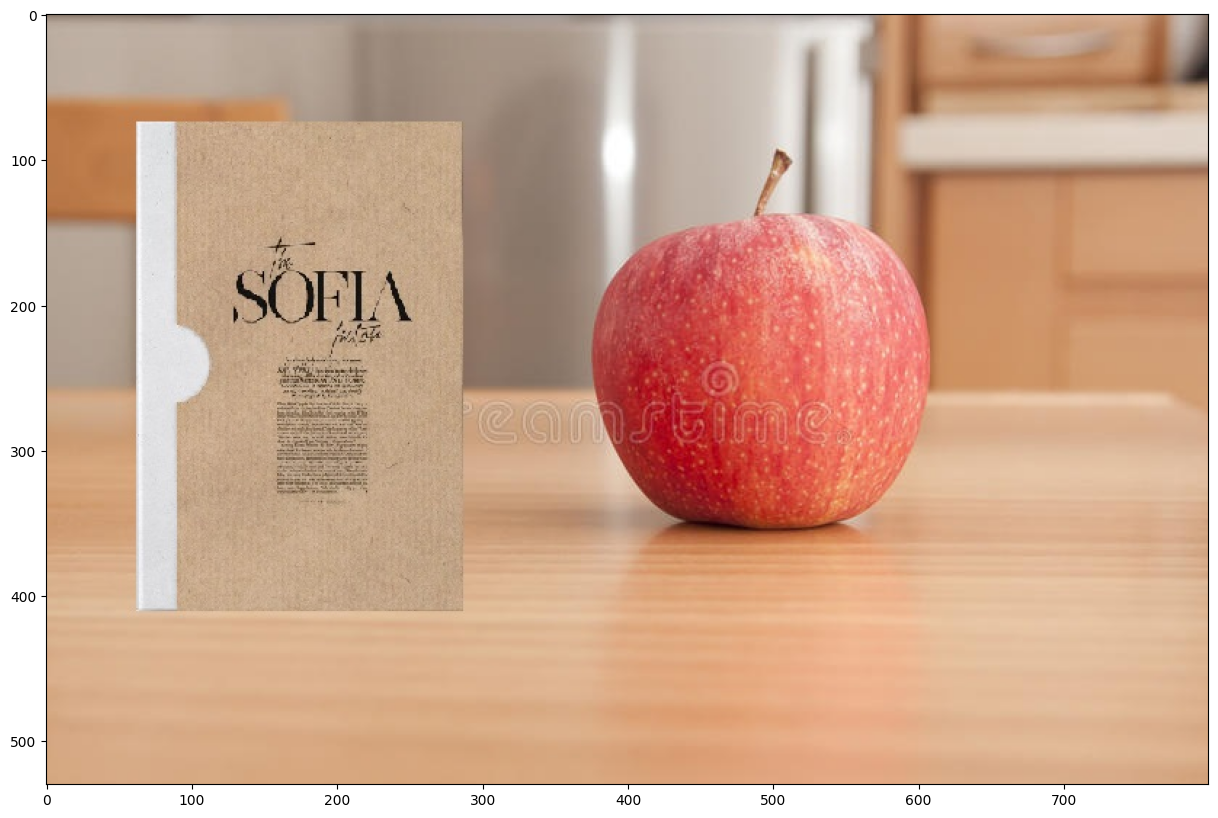

In [30]:
# starting

import imutils

# rotating the image and displaying it
# rotated = imutils.rotate_bound(scene, -33)
rotated = scene
showInRow([rotated])

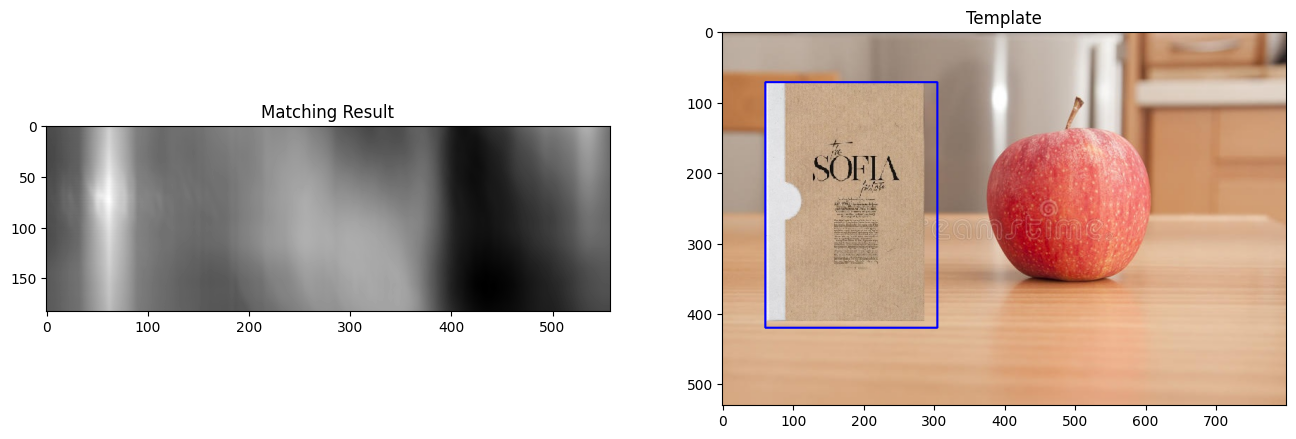

In [31]:
#@title Template matching { run: "auto" }

# different template matching methods
methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED, 
           'TM_CCORR':cv2.TM_CCORR, 'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED, 
           'TM_SQDIFF': cv2.TM_SQDIFF, 'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}

# interactive interface
method = "TM_CCOEFF" #@param ["TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF", "TM_SQDIFF_NORMED"]

# initialising template and canvas for final image
img_template = book
img_detected = rotated.copy()

# getting height and width 
h, w, c = img_template.shape

# using the matchTemplate function
res = cv2.matchTemplate(rotated,img_template,methods[method])

# getting max-min values and their positions
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# drawing rectange
cv2.rectangle(img_detected,top_left, bottom_right, (0,0,255), 2)

# displaying images    
showInRow([res, img_detected], ['Matching Result', 'Template'])    

In [ ]:
# re-rotating and displaying images
template_rotated = imutils.rotate_bound(img_detected, 33)
showInRow([scene, book, template_rotated], ["source",  "book", "detected object"])

In [ ]:


# function to crop black edges
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

# testing cropped image 
cropped = crop(template_rotated)
showInRow([cropped])


In [ ]:
# displaying images
showInRow([scene, book, cropped], ["source",  "book", "detected object"])